# <b> Project Description </b>

The Titanic Survival Preddiction Model is a classis Beginner project aimed at utilizing machine learning techniques to predict
whether a passenger on the Titanic survived or not . This Project leverages the well-known Titanic dataset , Which includes crucial 
information about individual passengers such age , gender , ticket class , fare , cabin and survival status 

## <b> Objective </b> 

The Primary objective of this project is to build a robust machine learning  model that accurately predicts the survival outcome 
of passengers aboard the Titanic based on their individual charcterisitic . By analyzing and processing the dataset , we aim to develop a model capable 
of making predictions with a high degree of accuracy 

###  import some libraries for analysis 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

#### Support warning for clean notebook 

In [3]:
import warnings 
warnings.filterwarnings("ignore")

#### Read data 

In [5]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Summary of data 

In [13]:
print('Number of columns in dataset :{} ' .format(df.shape[1]))
print('Number of rows in dataset :{} '.format(df.shape[0]))
print('Size of the dataset : {}'.format(df.size))

Number of columns in dataset :12 
Number of rows in dataset :418 
Size of the dataset : 5016


In [14]:
df.describe()(df.count().sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
df.count().sum()

4602

In [14]:
df.duplicated().sum()

0

In [15]:
print("The Number of item in the dataset is : {}" .format(df.count().sum()))

The Number of item in the dataset is : 4602


In [16]:
print("Number of duplicate rows in a dataset : {} ".format(df.duplicated().sum()))

Number of duplicate rows in a dataset : 0 


In [17]:
print('The Total Number of null values in each columns : ')
print(df.isnull().sum())

The Total Number of null values in each columns : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [18]:
print('Missing values in the dataset is : ')
print('Age  : {} '.format(df['Age'].isnull().sum()))
print('Cabin  : {} '.format(df['Cabin'].isnull().sum()))
print('Fare  : {} '.format(df['Fare'].isnull().sum()))

Missing values in the dataset is : 
Age  : 86 
Cabin  : 327 
Fare  : 1 


In [19]:
print('The Number of non-null values in the eash columns : ')
print(df.count())

The Number of non-null values in the eash columns : 
PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64


In [20]:
print("Port of embarkation")
print('C = Cherbourg , Q = Queenstown , S = Southmpton')
df['Embarked'].value_counts()

Port of embarkation
C = Cherbourg , Q = Queenstown , S = Southmpton


Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [21]:
print('The total Number of passengers on the slip is : {}'.format(df['Sex'].count().sum()))
print("\n Gender of the passenger (Male or Female :")
df['Sex'].value_counts()

The total Number of passengers on the slip is : 418

 Gender of the passenger (Male or Female :


Sex
male      266
female    152
Name: count, dtype: int64

In [22]:
print('Percentage if male passengers : {}'.format(100*266/df['Sex'].count().sum()))
print('Percentage if female passengers : {}'.format(100*152/df['Sex'].count().sum()))

Percentage if male passengers : 63.63636363636363
Percentage if female passengers : 36.36363636363637


In [23]:
print('Pclass: Ticket class (1st , 2nd , 3rd)')
df['Pclass'].value_counts()

Pclass: Ticket class (1st , 2nd , 3rd)


Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [24]:
print('Percentage of  passengers in 1 class: {}'.format(100*107/df['Pclass'].count().sum()))
print('Percentage of  passengers in 2 class: {}'.format(100*93/df['Pclass'].count().sum()))
print('Percentage of  passengers in 3 class: {}'.format(100*218/df['Pclass'].count().sum()))

Percentage of  passengers in 1 class: 25.598086124401913
Percentage of  passengers in 2 class: 22.248803827751196
Percentage of  passengers in 3 class: 52.15311004784689


In [25]:
print('Survived : Binary indicator (0 or 1 representing whether the passenger survived (1) or not (0) ')
df['Survived'].value_counts()

Survived : Binary indicator (0 or 1 representing whether the passenger survived (1) or not (0) 


Survived
0    266
1    152
Name: count, dtype: int64

In [26]:
print('Parch : Number of parents /children aboard ')
df['Parch'].value_counts()

Parch : Number of parents /children aboard 


Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

In [27]:
print("Sibsp :Number of siblings / spouses aboard")
df['SibSp'].value_counts()

Sibsp :Number of siblings / spouses aboard


SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [28]:
temp_pclass = df['Pclass'].unique()
for temp_value in temp_pclass :
    temp_p = df[df['Pclass'] == temp_value]
    percentage_of_pclass = (temp_p['Survived'].sum()/len(temp_p))*100

    print(f"Pencentage of passengers i the class {temp_value} that Survived : {percentage_of_pclass : .2f} %" )

Pencentage of passengers i the class 3 that Survived :  33.03 %
Pencentage of passengers i the class 2 that Survived :  32.26 %
Pencentage of passengers i the class 1 that Survived :  46.73 %


In [29]:
# droping the cabin column 
df.drop(columns = ['Cabin'] , inplace = True)

In [30]:
#Randomly assign mean age values to the 86 missing entries for age 
Random_Avg = np.random.randint(df['Age'].mean()-df['Age'].std(),df['Age'].mean()+df['Age'].std(),86)
Random_Avg

array([20, 43, 25, 34, 28, 16, 35, 24, 36, 30, 29, 17, 38, 23, 40, 31, 19,
       20, 33, 41, 31, 33, 26, 37, 36, 26, 33, 39, 20, 33, 36, 40, 30, 35,
       19, 28, 25, 17, 33, 36, 19, 22, 33, 34, 42, 27, 36, 24, 19, 33, 26,
       26, 23, 40, 33, 40, 29, 40, 31, 19, 34, 29, 26, 41, 24, 26, 18, 35,
       36, 16, 31, 28, 33, 23, 20, 38, 24, 35, 39, 22, 16, 36, 23, 35, 41,
       28])

In [31]:
df['Age'].mean()-df['Age'].std(),df['Age'].mean()+df['Age'].std()

(16.091381125821364, 44.4537995970702)

In [32]:
# Fill all the missing values for age as determined above 
df['Age'][df['Age'].isnull()] = Random_Avg
# 2nd method 
# df.loc[df['Age'].isnull()] =Random_Avg

In [33]:
# Fill the one missing value with the means value of Fare 
df['Fare'].fillna(df['Fare'].mean() , inplace = True )

In [34]:
# Now this data is more precise 
df.isnull().count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Embarked       418
dtype: int64

In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.139952,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,13.078329,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,38.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Text(0.5, 1.0, 'Boxplot For Age ')

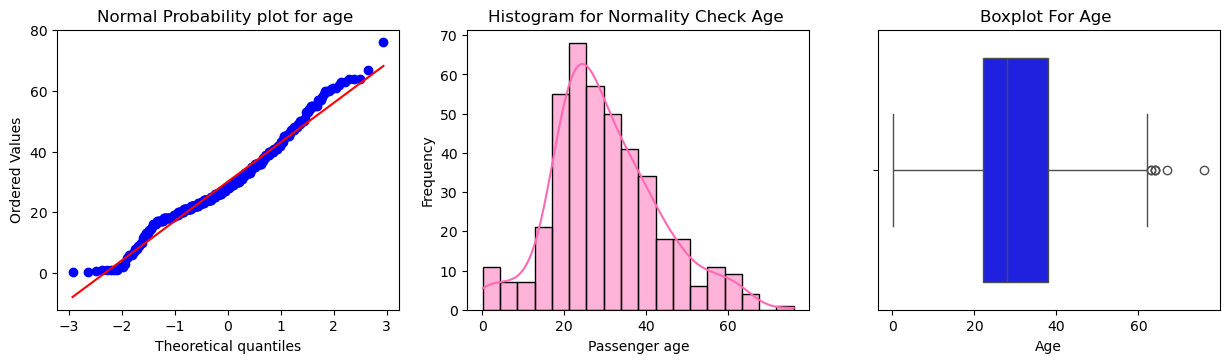

In [36]:
# Normality Check 
# Normality probability plots 
from scipy import stats 
import scipy as scipy 

# Normality for age  

plt.figure(figsize= (15,8))

plt.subplot(2,3,1)
stats.probplot(df['Age'],plot = plt )
plt.title("Normal Probability plot for age ")



plt.subplot(2,3,2)
sns.histplot(df['Age'] , kde = True , color = 'hotpink')
plt.title('Histogram for Normality Check Age ')
plt.xlabel('Passenger age')
plt.ylabel('Frequency')

plt.subplot(2,3,3)
sns.boxplot(x=df['Age'] , color= (0,0,1))
plt.title('Boxplot For Age ')

In [37]:
min_thresold = df['Age'].quantile(0.05)
print('min_thresold  values is : ' , min_thresold)
print('No of passenger below {} years : {}'. format(min_thresold,df[df['Age']<min_thresold].value_counts().sum()))

min_thresold  values is :  10.0
No of passenger below 10.0 years : 20


In [38]:
max_thresold = df['Age'].quantile(0.95)
print('min_thresold  values is : ' , max_thresold)
print('No of passenger above {} years : {}'. format(min_thresold,df[df['Age']>max_thresold].value_counts().sum()))

min_thresold  values is :  55.0
No of passenger above 10.0 years : 19


Text(0.5, 1.0, 'Boxplot For Fare ')

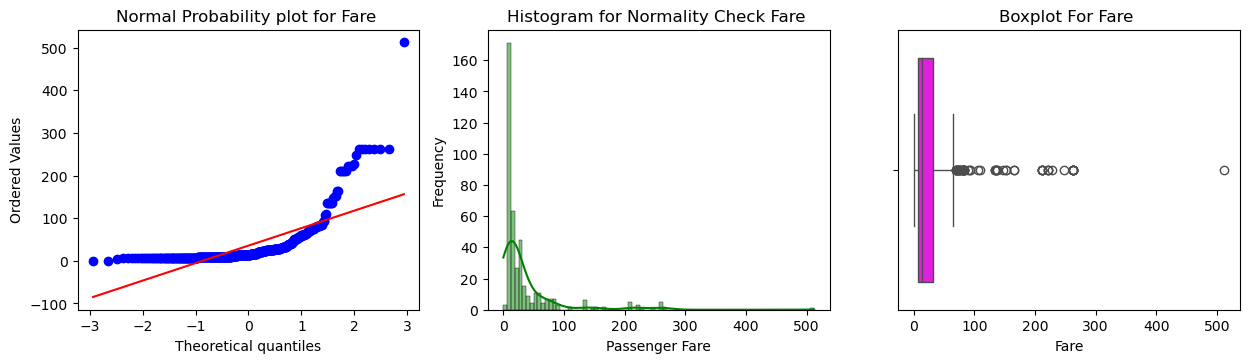

In [39]:
# Normality Check 
#Normal 
plt.figure(figsize= (15,8))

plt.subplot(2,3,1)
stats.probplot(df['Fare'],plot = plt )
plt.title("Normal Probability plot for Fare ")


plt.subplot(2,3,2)
sns.histplot(df['Fare'] , kde = True , color = 'green')
plt.title('Histogram for Normality Check Fare ')
plt.xlabel('Passenger Fare')
plt.ylabel('Frequency')

plt.subplot(2,3,3)
sns.boxplot(x=df['Fare'] , color= (1,0,1))
plt.title('Boxplot For Fare ')

<br>
In the normal probability plot , all data points are many are away from the linear line , indicating a non- normal distribution <br>
<br>
In the histogram not shoes a curve that resembles a normal distribution. Thereforre , we can says that the data is not normal <br> 
<br>
In the boxplot , there are more then 15  outliers in the fare dataset , suggesting the presence of extreme values that fall out side the typical range <br>
<br>
<b> Therefore , we check the normality by the Shapiro test </b>

In [41]:
from scipy import stats 

# Perform the Shapiro-wilk test 
stat , p_value = stats.shapiro(df['Fare'])

print('Test statistic : ',stat)
print('p_value : ',p_value)
# Interpret the result 
alpha = 0.05
if p_value > alpha :
    print("The data is normally distribution (fail to reject H0) ")
else : 
    print("The data is not normally distribution (reject H0 ) ")

Test statistic :  0.5394866302077911
p_value :  1.2919489983325553e-31
The data is not normally distribution (reject H0 ) 


In [42]:
print("The p-values is extremely small (1.29e-31) , which is much less than 0.05")
print("There fore , you would reject the null hypothesis and conclude that the data is n not normally distributon ")

The p-values is extremely small (1.29e-31) , which is much less than 0.05
There fore , you would reject the null hypothesis and conclude that the data is n not normally distributon 


<b>DataFrame </b>
<br>
#####  We aim to gain insights into the Titanic dataset by exploring the distribution of key features , inderstanding relationship between different variables , and assessing their impact on survival Through a variety of charts , we seek to unravel the intricate patterns and dynamics within the data

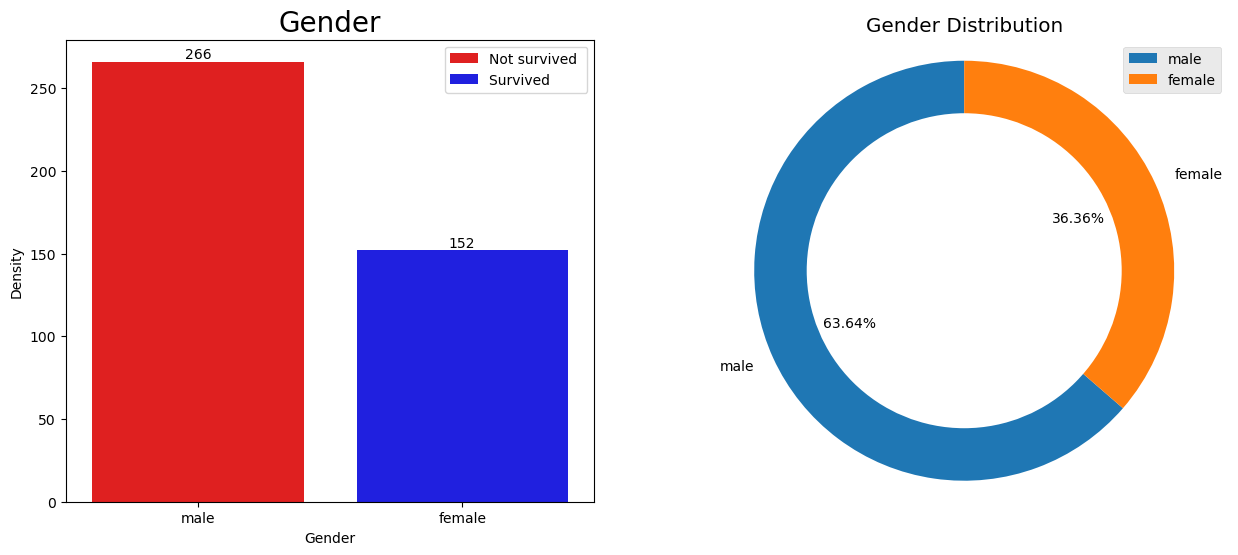

In [44]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
color_gen = {1: "Blue" ,0 : "red" }
countP_gender = sns.countplot(x='Sex', hue = "Survived" ,data =df , palette = color_gen , alpha = 1)

for temp_survival in countP_gender.containers :
    countP_gender.bar_label(temp_survival)

plt.xlabel("Gender")
plt.ylabel("Density")
plt.title("Gender" , fontsize = 20)
plt.legend(labels = ["Not survived " , "Survived " ])


plt.subplot(1,2,2)
gender_counts = df['Sex'].value_counts()
labels = gender_counts.index
plt.style.use('ggplot')
plt.pie(gender_counts , labels = labels , autopct =  '%.2f%%' , startangle=90)
plt.axis('equal')
plt.legend(loc = 'upper right')
circle = plt.Circle(xy = (0,0) , radius = 0.75 , facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("Gender Distribution")
plt.show()

##### The total number of passengers is 418 , with 63.64% being male and 36.36% being female interestingly <br>
<b> all males did not survive </b> <br>
<b> all females survived </b>

In [46]:
A = df[(df['Survived'] == 0 ) & (df['Sex'] == "female")].value_counts().sum()
A

0

In [47]:
B = df[df['Sex'] == 'female'].count()
B

PassengerId    152
Survived       152
Pclass         152
Name           152
Sex            152
Age            152
SibSp          152
Parch          152
Ticket         152
Fare           152
Embarked       152
dtype: int64

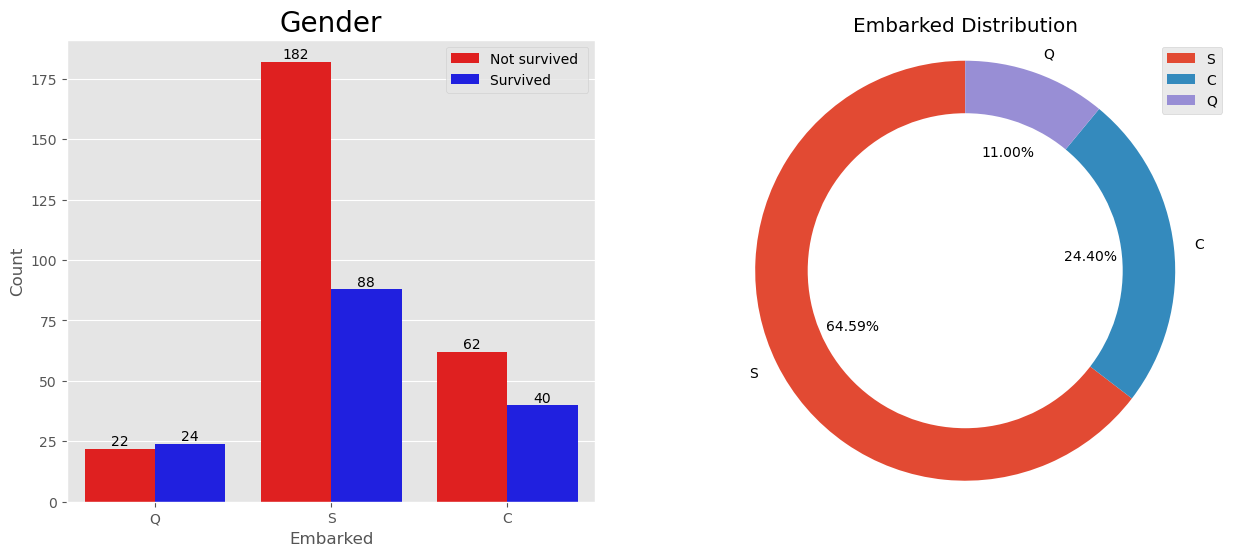

In [48]:
 plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
color_em = {1: "Blue" , 0: "red" }
countP_em = sns.countplot(x='Embarked', hue = "Survived" ,data =df , palette = color_gen , alpha = 1)

for temp_survival in countP_em.containers :
    countP_em.bar_label(temp_survival)

plt.xlabel("Embarked")
plt.ylabel("Count")
plt.title("Gender" , fontsize = 20)
plt.legend(labels = ["Not survived " , "Survived " ])


plt.subplot(1,2,2)
em_counts = df['Embarked'].value_counts()
labels = em_counts.index
plt.style.use('ggplot')
plt.pie(em_counts , labels = labels , autopct =  '%.2f%%' , startangle=90)
plt.axis('equal')
plt.legend(loc = 'upper right')
circle = plt.Circle(xy = (0,0) , radius = 0.75 , facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("Embarked Distribution")
plt.show()

<b>There are three ports of embarkation : Chebourg(C) with 24.40%  , Queenstown (Q) with 11.00% , and Southampton (S) With the 
highest percentage of 64.59% <br>
In Cherbourg , 22 passengers did not survive , and 24 survived <br>
In Queenstown , 182 passengers did not survive , while 88  survived <br>
In Sourhampton , 62 passengers did not survive , while 40 survived . Southampton has the 
highest percentage of passengers </b>

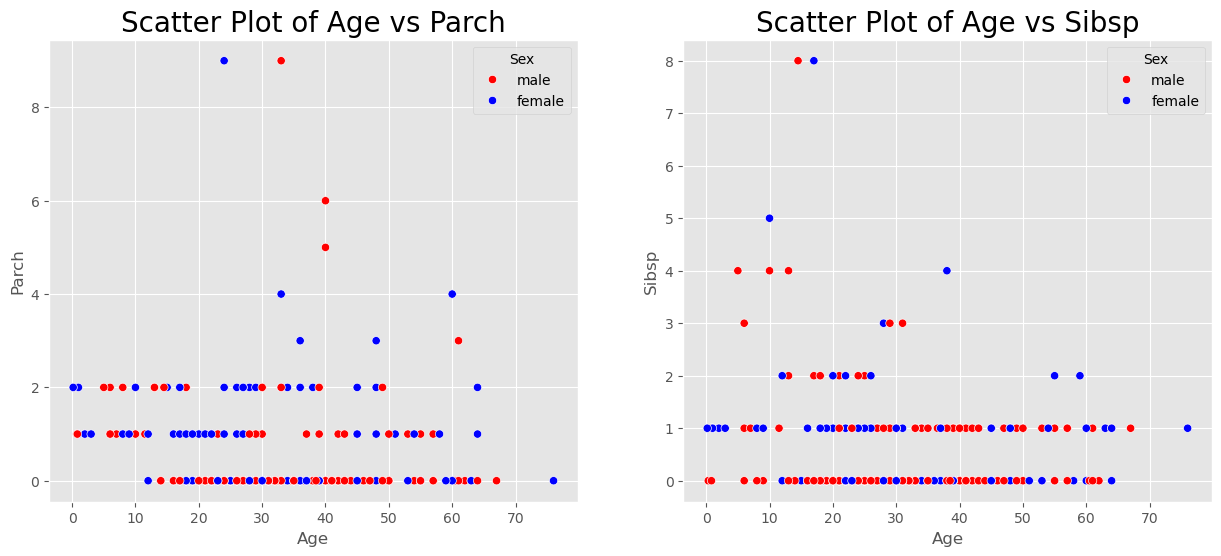

In [50]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df['Age'] , y=df['Parch'], hue = df['Sex'] , palette = {'male': 'red' , 'female' : "blue"})
plt.title('Scatter Plot of Age vs Parch' , fontsize= 20)
plt.xlabel('Age')
plt.ylabel('Parch')

plt.subplot(1,2,2)
sns.scatterplot(x=df['Age'] , y =df['SibSp'] , hue = df['Sex'] , palette={'male' : "Red" ,'female' : "blue"})
plt.title('Scatter Plot of Age vs Sibsp' , fontsize= 20)
plt.xlabel('Age')
plt.ylabel('Sibsp')

plt.show()


<b>Scatter plot of Age vs Parch </b> <br>
High Parch values (0-2) in Titanic data likely indicate small families or immediate family presnce <br>
Parch = 0 Many male passengers traveled without parents or children . and also indicates passengers in their 
20s to 50s who were traveling alone or with siblings / spouses , excluding parents and chilren <br>
Parch = 1 Many female passengers with one parent / child aboard , suggesting family travel might be associated with higher 
female survival rates <br>
Parch = 2 Hight male presence suggests potential family groups with fathers and sons <br>
<b> Scatter plot of Age vs Sibsp : </b><br>
(SisSp = 0) Most male passengers traveled without siblings or spouses and also Most pasengers without siblings / spouses aboard were between 20  and 
50 years old . <br>
(SisSp = 1) Equal numbers of males and females had one sibling or spouse aboard <br> 
(SisSp = 2) Among male passengers , those with two siblings or close relatives (Sibsp = 2) stand out as a unique group 

In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.139952,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,13.078329,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,38.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [53]:
df[(df['Sex'] == 'male')].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,266.000000,266.0,266.000000,266.000000,266.000000,266.000000,266.000000
mean,1102.620301,0.0,2.334586,30.044774,0.379699,0.274436,27.558326
std,119.520499,0.0,0.808497,12.337659,0.843735,0.883745,41.004848
min,892.000000,0.0,1.000000,0.330000,0.000000,0.000000,0.000000
25%,999.250000,0.0,2.000000,22.000000,0.000000,0.000000,7.854200
50%,1103.500000,0.0,3.000000,28.000000,0.000000,0.000000,13.000000
75%,1203.750000,0.0,3.000000,38.375000,1.000000,0.000000,26.550000
max,1309.000000,0.0,3.000000,67.000000,8.000000,9.000000,262.375000


In [54]:
df[(df['Sex'] == 'female')].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,152.000000,152.0,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1096.789474,1.0,2.144737,30.306513,0.565789,0.598684,49.747699
std,123.345508,0.0,0.887051,14.323704,0.974313,1.105434,73.108716
min,893.000000,1.0,1.000000,0.170000,0.000000,0.000000,6.950000
25%,989.500000,1.0,1.000000,22.000000,0.000000,0.000000,8.626050
50%,1093.500000,1.0,2.000000,29.000000,0.000000,0.000000,21.512500
75%,1205.250000,1.0,3.000000,36.250000,1.000000,1.000000,55.441700
max,1306.000000,1.0,3.000000,76.000000,8.000000,9.000000,512.329200


In [55]:
df.groupby('Sex')[['Survived','Pclass', 'Age', 'SibSp','Fare']].mean()

,Survived,Pclass,Age,SibSp,Fare
Sex,,,,,
female,1.0,2.144737,30.306513,0.565789,49.747699
male,0.0,2.334586,30.044774,0.379699,27.558326


In [56]:
df.groupby('Embarked')[['Survived','Pclass', 'Age', 'SibSp','Fare']].mean()

,Survived,Pclass,Age,SibSp,Fare
Embarked,,,,,
C,0.392157,1.794118,33.671569,0.421569,66.259765
Q,0.521739,2.869565,30.586957,0.195652,10.957700
S,0.325926,2.340741,28.729630,0.500000,28.257832


In [57]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,35.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,41.0,0,0,359309,8.0500,S


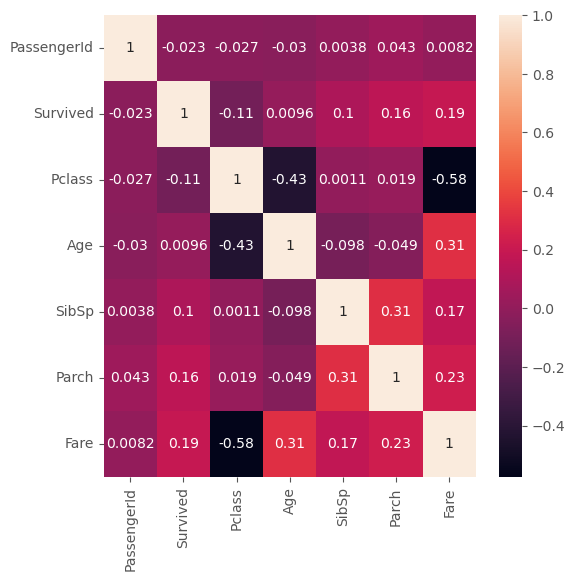

In [58]:
import warnings
warnings.simplefilter("ignore")
import seaborn as sns 
data = df.drop([ 'Name' , 'Sex' , 'Embarked' , 'Ticket'], axis = 1)
# get correlations of each features in dataset 
corr_mat = data.corr()
top_corr_feature = corr_mat.index
# plot the figure using matplot lib 
plt.figure(figsize = (6,6))
# plot heat map using seaborn
x = sns.heatmap(data[top_corr_feature].corr(), annot = True )

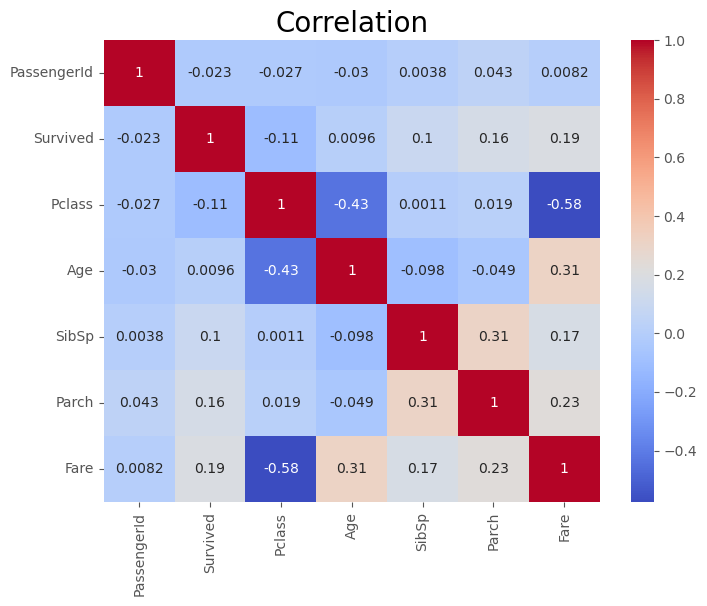

In [59]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot = True , cmap = 'coolwarm')
plt.title("Correlation" , fontsize = 20 )
plt.show()

<br>
<b>This heatmap chart highkights that there is a high negative correlation between Pclass and both Age and Fare in the Titsnic dataset  <br>
<br>
Additionally , Age versus Fare and SibSp versus Parch exhibit a moderate correlation of 0.32 <br>
<br>
Moreover , there is a moderate positive correlation of 0.19 between Survived and Fare </b>

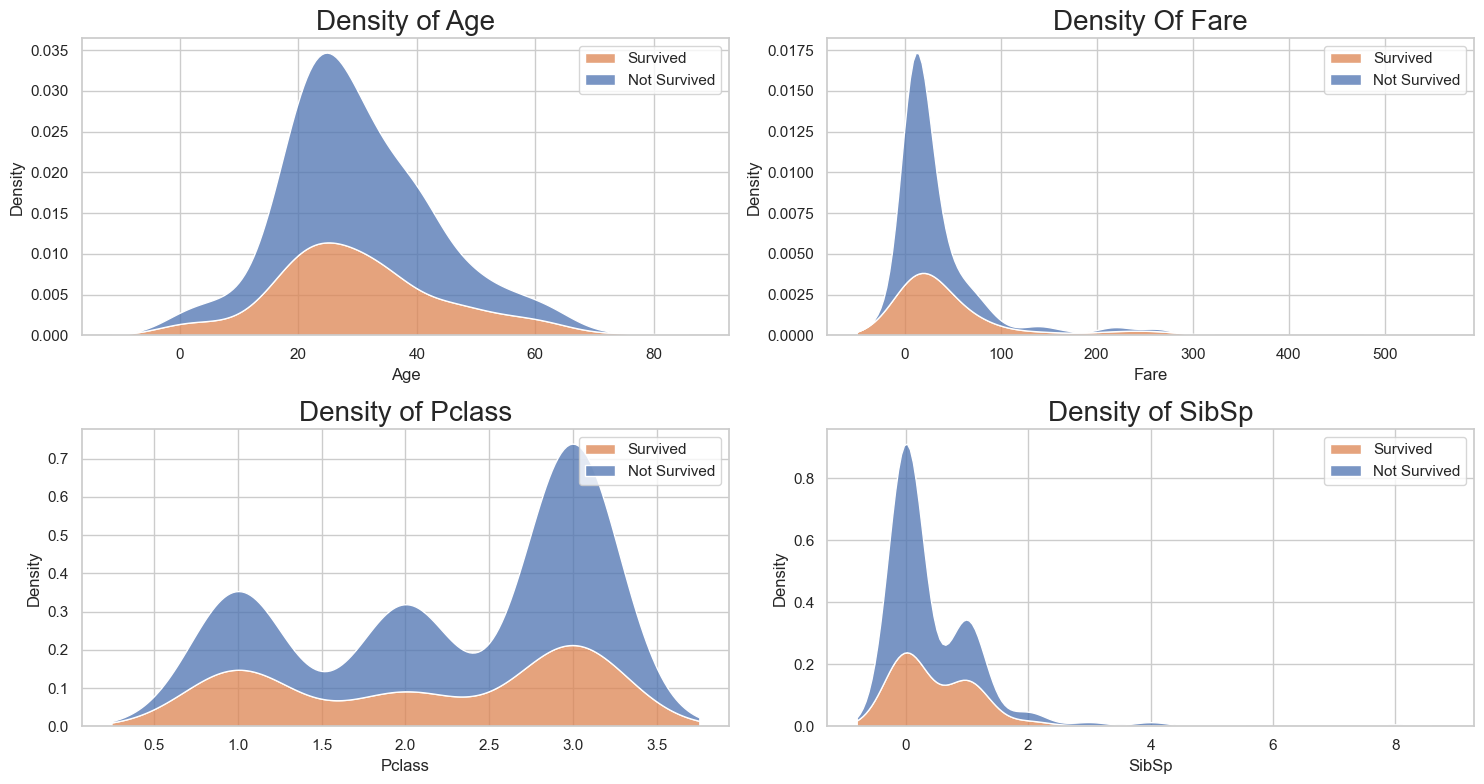

In [61]:
plt.figure(figsize=(15,8))
sns.set(style = 'whitegrid')

plt.subplot(2,2,1)
color_gen = {0:"Blue" , 1 : "red"}
sns.kdeplot( data = df , x = "Age" , hue = "Sex" , multiple = "stack")
plt.title("Density of Age" , fontsize = 20)
plt.legend(labels = ['Survived' , 'Not Survived'])

plt.subplot(2,2,2)
color_gen = {1 : "Blue" , 0 : "red"}
sns.kdeplot(data = df , x ="Fare" , hue = "Sex" , multiple = "stack")

plt.title("Density Of Fare",fontsize = 20 )
plt.legend(labels = ['Survived' , 'Not Survived'])

plt.subplot(2,2,3)
color_gen = {0:"Blue" , 1 : "red"}
sns.kdeplot( data = df , x = "Pclass" , hue = "Sex" , multiple = "stack")
plt.title("Density of Pclass" , fontsize = 20)
plt.legend(labels = ['Survived' , 'Not Survived'])

plt.subplot(2,2,4)
color_gen = {1 : "Blue" , 0 : "red"}
sns.kdeplot(data = df , x ="SibSp" , hue = "Sex" , multiple = "stack")
plt.title("Density of SibSp" , fontsize = 20)
plt.legend(labels = ['Survived' , 'Not Survived'])

plt.tight_layout()
plt.show()

<br>
<br>
<b>Density of Age graph : </b> The density plot for age reveals that the maximum number od survvors fall within the age range of 20 to 40 <br>
<br>
<b>Density of Fare graph : </b> In the density plot for Fare , it is observed that the majority of survivors and non-survivvors are concentrated in the Fare Price range of 0 to 100 <br>
<br>
<b>Density of Pclass graph : </b> The density plot for Pclass indicates that the highest number of survivors and non-survivors belong to the 3rd class <br>
<br>
<b>Density of SibSp graph :</b> The density plot for SibSp shows that the maximum number of survivors and non-survivors corresponds to a SibSp value of 0

In [63]:
df1= df.drop([ "PassengerId" ,'Name' , 'Ticket'], axis = 1)

In [64]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder_apply= df1.apply(labelencoder.fit_transform)
labelencoder_apply.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,44,0,0,24,1
1,1,2,0,60,1,0,5,2
2,0,1,1,74,0,0,41,1
3,0,2,1,34,0,0,34,2
4,1,2,0,27,1,1,46,2


In [65]:
# from  sklearn.preprocessing import LabelEncoder
# le = LabelEncoder
# df['Sex'] = le.fit_transform(df['Sex'])
# df['Embarked'] = le.fit_transform(df['Embarked'])
# print(le.classes_)
# df.head(10)

In [66]:
print('Size of dataframe after convert  numeric data set : ' , df.shape)
print('Rows : ' , df1.shape[0])
print('Cloumns : ' ,df1.shape[1])

Size of dataframe after convert  numeric data set :  (418, 11)
Rows :  418
Cloumns :  8


In [67]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x  = labelencoder_apply.drop('Survived' , axis =  1)
y = labelencoder_apply['Survived']

In [70]:
x_train , x_test, y_train , y_test  = train_test_split(x , y , test_size=0.30 , random_state=42  )
len(x_train)

292

In [71]:
len(x_test)

126

In [72]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [73]:
logmodel.fit(x_train , y_train)

LogisticRegression()

In [74]:
prediction = logmodel.predict(x_test)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [75]:
from sklearn.metrics import classification_report , accuracy_score
y_predicted = logmodel.predict(x_test)
print("Training dataset Score : " , logmodel.score(x_train , y_train)*100,'%')
print("Testing dataset Score : " , logmodel.score(x_test , y_test)*100,'%')
print("Classificatio report : \n" , classification_report(y_test , y_predicted) )
print("Acccuracy  score: \n" , accuracy_score(y_test , y_predicted) )

Training dataset Score :  100.0 %
Testing dataset Score :  100.0 %
Classificatio report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Acccuracy  score: 
 1.0


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Combine training and testing datasets  
X_combined =  pd.concat([x_train , x_test] , axis = 0) 
y_combined =  pd.concat([y_train , y_test] , axis = 0)

# Create Stratifiedkfold for cross - validation 
stratified_kfold = StratifiedKFold(n_splits= 5 , shuffle= True , random_state=42)

# Perform cross-validation 
cv_scores = cross_val_score(logmodel , X_combined , y_combined , cv=stratified_kfold , scoring='accuracy')
print("Cross-Validation Score : ",cv_scores)
print("Average Cross-Validation Score : ",np.mean(cv_scores)*100,'%')

Cross-Validation Score :  [1. 1. 1. 1. 1.]
Average Cross-Validation Score :  100.0 %


In [ ]:
# Confusion Matrix Visualiztion 

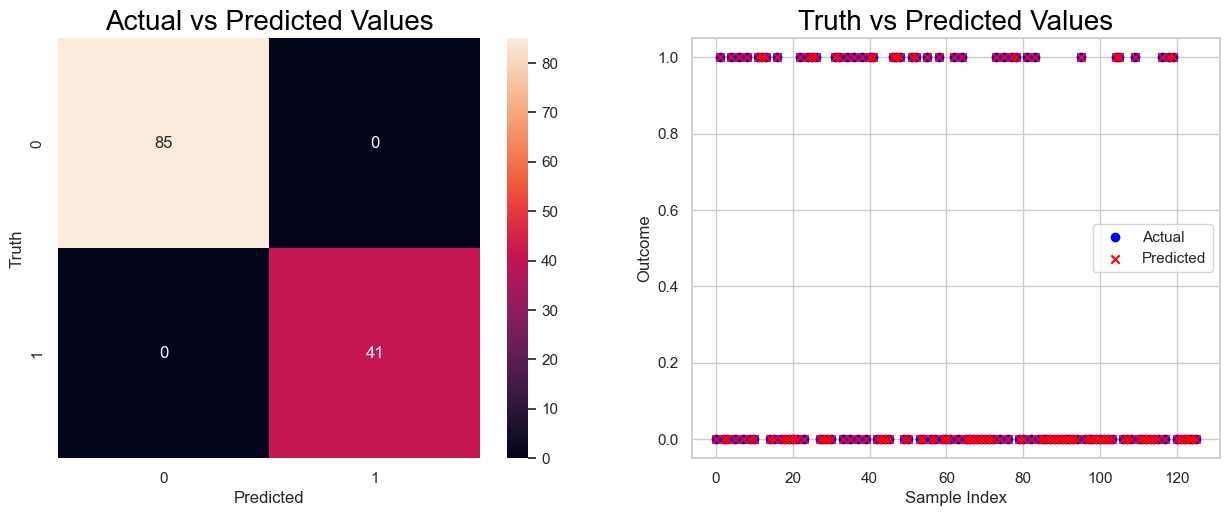

In [145]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_predicted)

# Confusion martix visual 
plt.figure(figsize=(15,12))
sns.set(style = 'whitegrid')


plt.subplot(2,2,1)
sns.heatmap(cm , annot = True)
plt.title('Actual vs Predicted Values' , color='black' ,  fontsize = 20)
plt.xlabel('Predicted')
plt.ylabel('Truth')


plt.subplot(2,2,2)
plt.scatter(range(len(y_test)) , y_test , label = 'Actual' , marker = 'o' , color = 'blue') 
plt.scatter(range(len(y_predicted)) , y_predicted , label = 'Predicted' , marker = 'x' , color = 'red') 
plt.title('Truth vs Predicted Values' , color='black' ,  fontsize = 20)
plt.xlabel('Sample Index')
plt.ylabel('Outcome')
plt.legend()
plt.show()